<a href="https://colab.research.google.com/github/Doiae9/DetectorPlacas/blob/main/Detecci%C3%B3n_de_placas_mediante_visi%C3%B3n_por_computadora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install tesseract-ocr

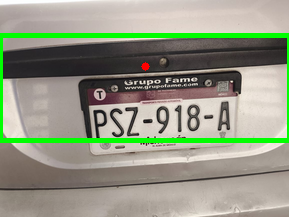

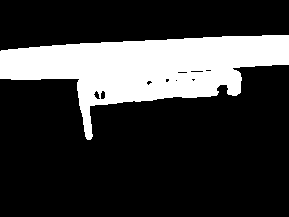

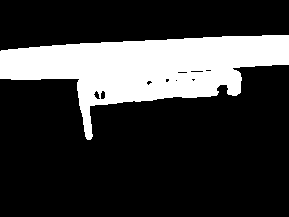

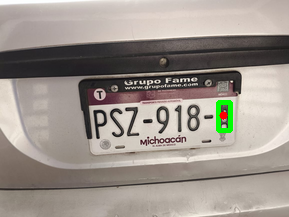

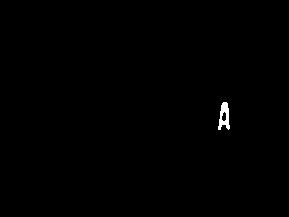

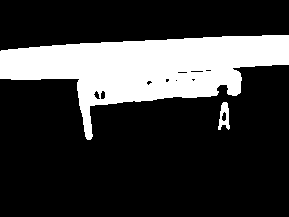

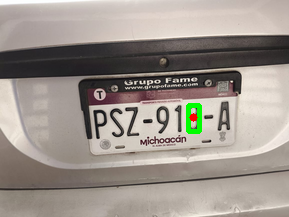

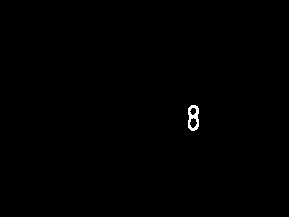

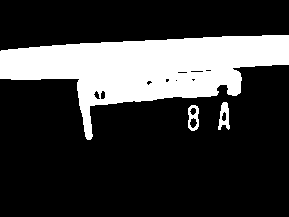

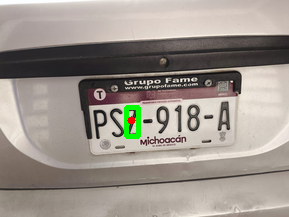

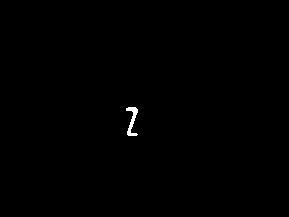

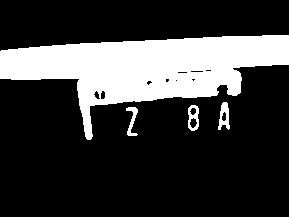

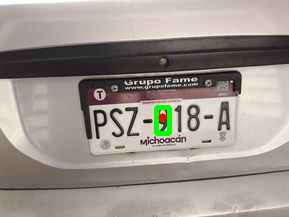

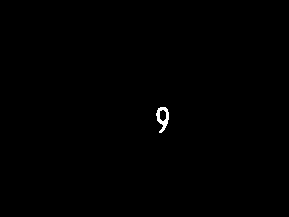

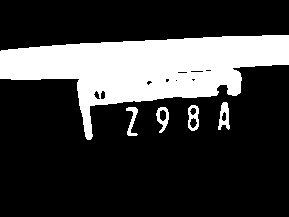

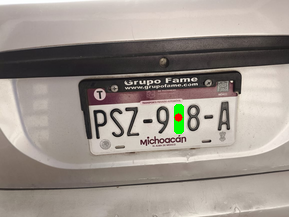

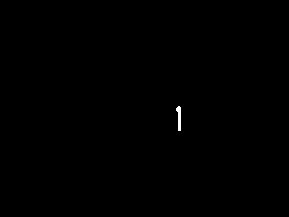

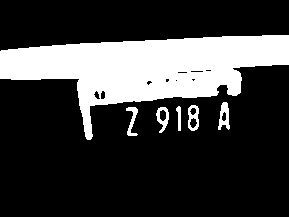

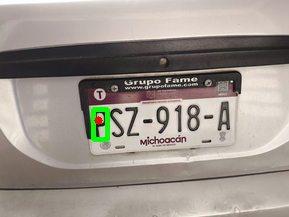

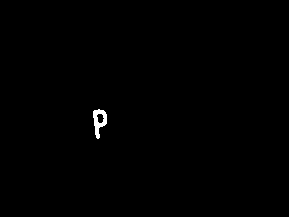

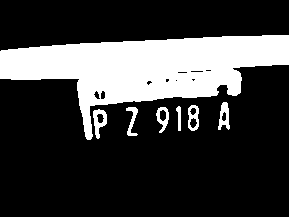

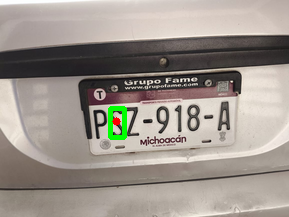

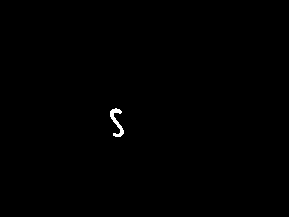

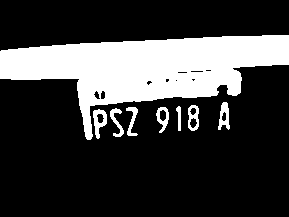

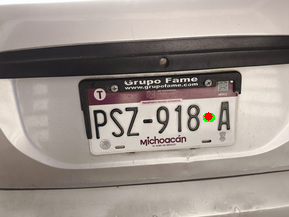

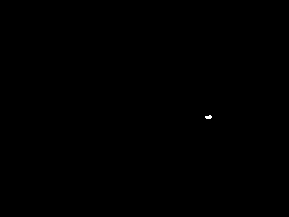

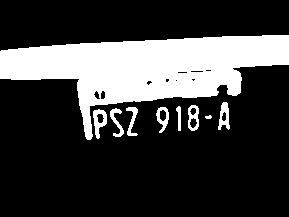

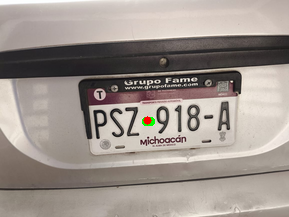

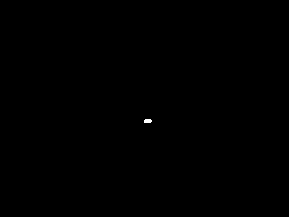

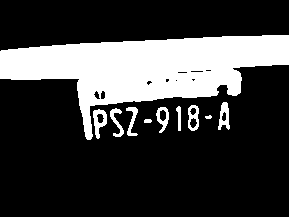

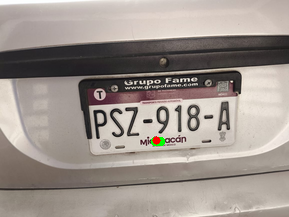

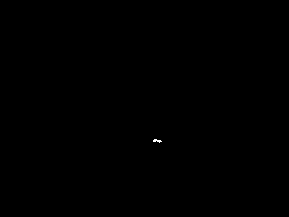

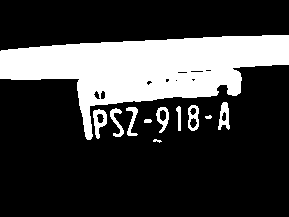

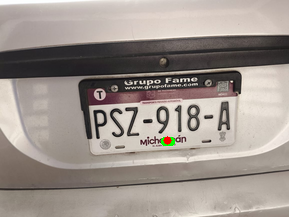

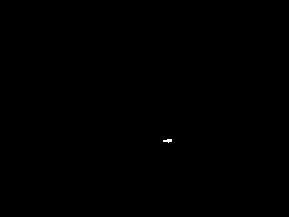

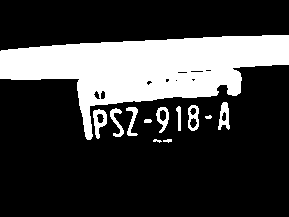

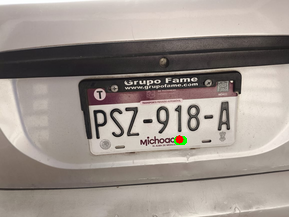

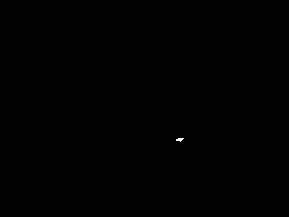

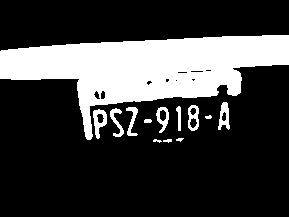

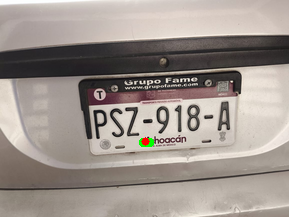

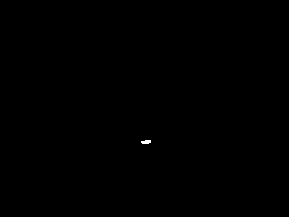

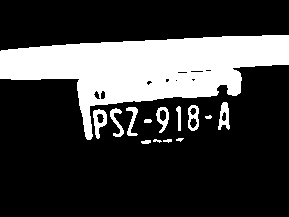

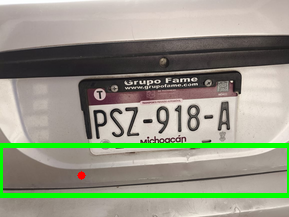

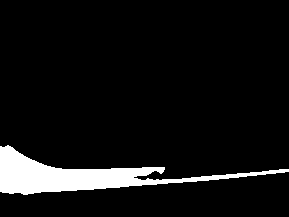

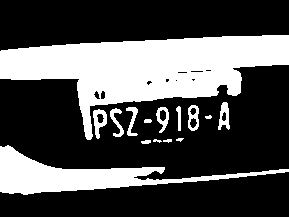

Texto detectado: =|:i6%S—_8alles an——aee


In [ ]:
import cv2
import numpy as np
import pytesseract
from google.colab import files
files.upload()
from google.colab.patches import cv2_imshow # Import cv2_imshow

pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
# Loading the image
imgO = cv2.imread("rsz_2placas_mich.png")
caracteres = []
# preprocess the image
gray_img = cv2.cvtColor(imgO, cv2.COLOR_BGR2GRAY)

# Applying 7x7 Gaussian Blur
blurred = cv2.GaussianBlur(gray_img, (7, 7), 0)

# Applying threshold
threshold = cv2.threshold(blurred, 0, 255,
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Apply the Component analysis function
analysis = cv2.connectedComponentsWithStats(threshold,
                                            4,
                                            cv2.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis

# Initialize a new image to
# store all the output components
output = np.zeros(gray_img.shape, dtype="uint8")

# Loop through each component
for i in range(1, totalLabels):

      # Area of the component
    area = values[i, cv2.CC_STAT_AREA]

    if area > 10:
        # Create a new image for bounding boxes
        new_img=imgO.copy()

        # Now extract the coordinate points
        x1 = values[i, cv2.CC_STAT_LEFT]
        y1 = values[i, cv2.CC_STAT_TOP]
        w = values[i, cv2.CC_STAT_WIDTH]
        h = values[i, cv2.CC_STAT_HEIGHT]

        # Coordinate of the bounding box
        pt1 = (x1, y1)
        pt2 = (x1+ w, y1+ h)
        (X, Y) = centroid[i]

        # Bounding boxes for each component
        cv2.rectangle(new_img,pt1,pt2,
                      (0, 255, 0), 3)
        cv2.circle(new_img, (int(X),
                             int(Y)),
                   4, (0, 0, 255), -1)

        # Create a new array to show individual component
        component = np.zeros(gray_img.shape, dtype="uint8")
        componentMask = (label_ids == i).astype("uint8") * 255

        # Apply the mask using the bitwise operator
        component = cv2.bitwise_or(component,componentMask)
        output = cv2.bitwise_or(output, componentMask)

        roi = threshold[y1:y1+h, x1:x1+w]
        custom_config = r'--oem 3 --psm 10'  # OEM: Engine Mode, PSM: Page Segmentation Mode
        char = pytesseract.image_to_string(roi, config=custom_config)

        # Filtrar caracteres no deseados
        if char.strip():
            caracteres.append(char.strip())

        # Mostrar las imágenes finales
        cv2_imshow(new_img) # Use cv2_imshow instead of cv2.imshow
        cv2_imshow(component)
        cv2_imshow(output)
        cv2.waitKey(0)

# Combinar caracteres en una cadena
resultado = ''.join(caracteres)
print("Texto detectado:", resultado)

cv2.destroyAllWindows()